Linear Regression - Multivariate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_prices.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [15]:
columns_of_interest = ['CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

In [16]:
df_new = df[columns_of_interest]
df_new.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df_new['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [25]:
#split car name into Brand & Model
car_name = "vw rabbit".split(' ')

print(car_name)
print(car_name[0])
print(car_name[1])

df_new['CarName'].str.split(' ',expand=True)


['vw', 'rabbit']
vw
rabbit


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: 0, Length: 205, dtype: object

In [26]:
df_new['CarBrand'] = df_new['CarName'].str.split(' ',expand=True)[0]

df_new.head()

C:\Users\eben\AppData\Local\Temp\ipykernel_11944\2662077541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['CarBrand'] = df_new['CarName'].str.split(' ',expand=True)[0]


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [30]:
df_new = df_new[['CarBrand', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

df_new

,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
df_new.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [35]:
df_new.CarBrand.replace('vokswagen','volkswagen', inplace=True)

df_new.CarBrand = df_new.CarBrand.replace('vw','volkswagen')

df_new.CarBrand = df_new.CarBrand.replace('maxda','mazda')
df_new.CarBrand = df_new.CarBrand.replace('Nissan','nissan')

df_new.CarBrand = df_new.CarBrand.replace('porcshce','porsche')
df_new.CarBrand = df_new.CarBrand.replace('toyouta','toyota')

C:\Users\eben\AppData\Local\Temp\ipykernel_11944\2600853187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.CarBrand.replace('vokswagen','volkswagen', inplace=True)


In [36]:
df_new.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [40]:
df_new.CarBrand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarBrand, dtype: int64

In [41]:
#check for duplicate rows
df_new.loc[df_new.duplicated()]

,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


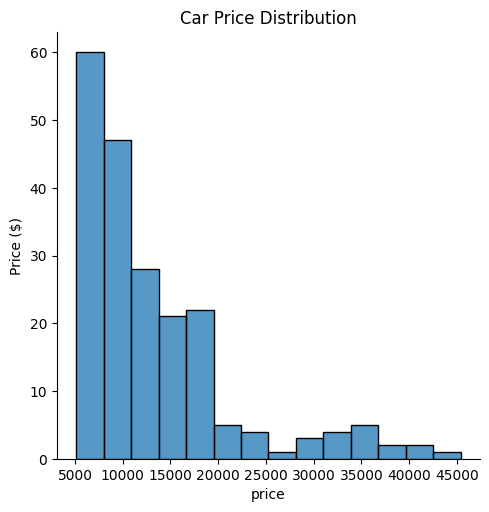

In [45]:
sns.displot(df_new['price'])
plt.title("Car Price Distribution")
plt.show()

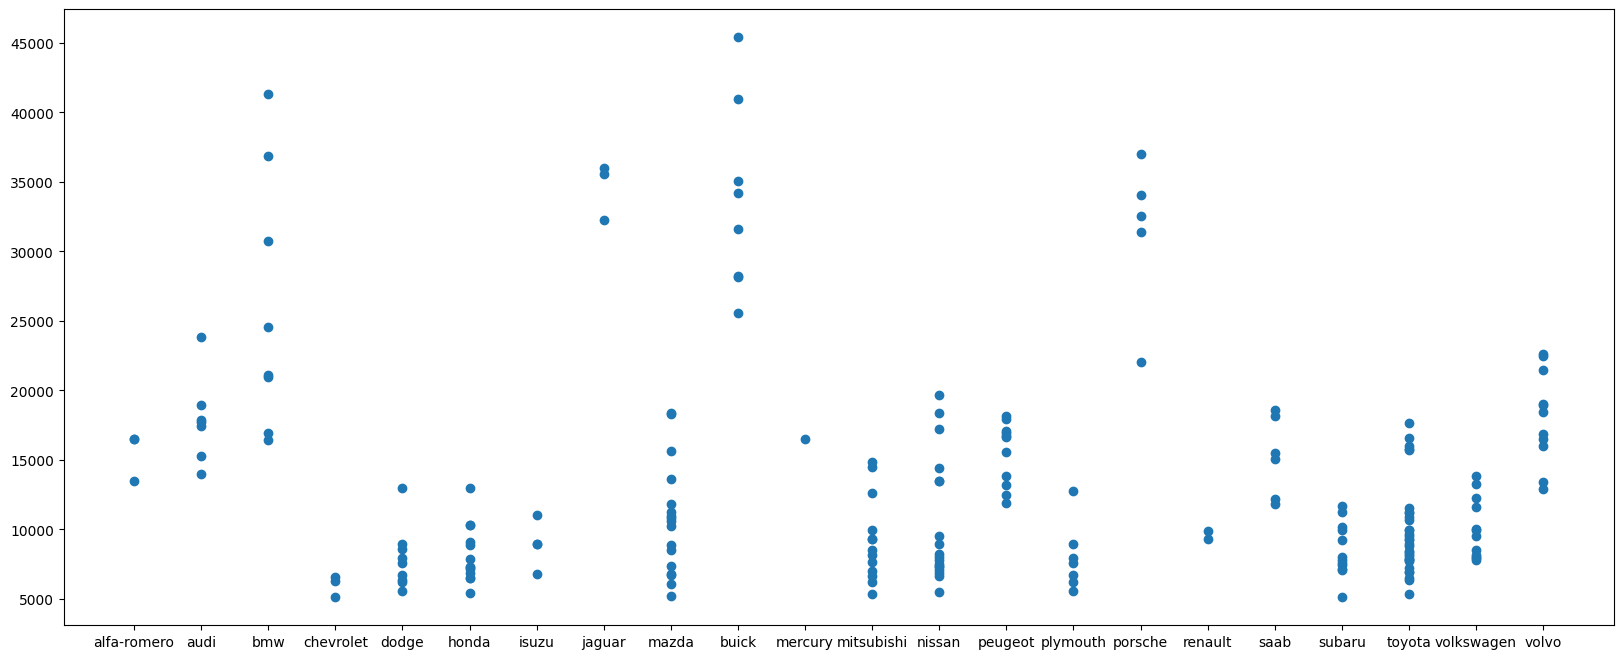

In [52]:
plt.figure(figsize=(20,8))
plt.scatter(df_new['CarBrand'], df_new['price'])

### Data Pre-Processing (Part 1 - One-Hot Encoding of Predictor Categorical)

In [55]:
df_new_withDummies = pd.get_dummies(df_new)
df_new_withDummies

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df_new_withDummies.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand_alfa-romero',
       'CarBrand_audi', 'CarBrand_bmw', 'CarBrand_buick', 'CarBrand_chevrolet',
       'CarBrand_dodge', 'CarBrand_honda', 'CarBrand_isuzu', 'CarBrand_jaguar',
       'CarBrand_mazda', 'CarBrand_mercury', 'CarBrand_mitsubishi',
       'CarBrand_nissan', 'CarBrand_peugeot', 'CarBrand_plymouth',
       'CarBrand_porsche', 'CarBrand_renault', 'CarBrand_saab',
       'CarBrand_subaru', 'CarBrand_toyota', 'CarBrand_volkswagen',
       'CarBrand_volvo', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelo

Train-Test Split

In [58]:
#for X - everything except 'price'
X = df_new_withDummies[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'CarBrand_alfa-romero',
       'CarBrand_audi', 'CarBrand_bmw', 'CarBrand_buick', 'CarBrand_chevrolet',
       'CarBrand_dodge', 'CarBrand_honda', 'CarBrand_isuzu', 'CarBrand_jaguar',
       'CarBrand_mazda', 'CarBrand_mercury', 'CarBrand_mitsubishi',
       'CarBrand_nissan', 'CarBrand_peugeot', 'CarBrand_plymouth',
       'CarBrand_porsche', 'CarBrand_renault', 'CarBrand_saab',
       'CarBrand_subaru', 'CarBrand_toyota', 'CarBrand_volkswagen',
       'CarBrand_volvo', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

Y = df_new_withDummies['price']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.7, shuffle=True,
                                                     random_state=20)

In [60]:
print("X (train, test) samples: ",X_train.shape, X_test.shape)
print("Y (train, test) samples: ",Y_train.shape, Y_test.shape)

X (train, test) samples:  (143, 73) (62, 73)
Y (train, test) samples:  (143,) (62,)


Training Model

In [62]:
from sklearn.linear_model import LinearRegression

lr_model_oneHotData = LinearRegression()

In [63]:
lr_model_oneHotData.fit(X_train, Y_train.values.reshape(-1, 1))

LinearRegression()

In [64]:
lr_model_oneHotData.intercept_

array([-8089.76425388])

In [65]:
lr_model_oneHotData.coef_

array([[ 3.17433235e+02, -2.08787645e+02,  4.32858774e+02,
        -3.85619236e+02,  8.71964181e+00,  9.74644226e+01,
        -5.24786736e+03,  1.25576122e+03, -6.67427993e+02,
         1.49571849e+00,  1.57792051e+00, -7.81953268e+01,
         1.71334412e+02,  1.84775172e+03,  2.88422981e+03,
         8.90076204e+03,  4.21599964e+03, -2.12977481e+03,
        -4.33644087e+03, -1.20809914e+03, -2.00211038e+03,
        -3.07630990e+03,  1.74625462e+02, -2.70578803e+02,
        -3.65589791e+03, -4.05187047e+02, -3.51755543e+03,
        -4.08243295e+03,  6.56087210e+03, -2.24323288e+03,
         4.42744932e+03, -1.29600036e+03, -1.41011747e+03,
        -2.63623200e+02,  8.85671054e+02,  2.71926638e+03,
        -2.71926638e+03, -9.61772586e+02,  9.61772586e+02,
         2.45765311e+02, -2.45765311e+02,  1.55283606e+03,
        -3.80461038e+02, -9.74933299e+02,  2.30133302e+02,
        -4.27575025e+02, -8.27310224e+02,  2.09537544e+02,
         6.17772680e+02, -3.86051997e+03,  3.86051997e+0

predict Y based on the X_test (30%)

In [66]:
Y_pred = lr_model_oneHotData.predict(X_test)


In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Model Score: ", lr_model_oneHotData.score(X_test, Y_test.values.reshape(-1, 1)), '%')

Mean Absolute Error: 1644.9061589139112
Mean Squared Error:  4640252.201767968
RMSE:  2154.1244629240828
R-squared:  0.8668564686691016
Model Score:  0.8668564686691016 %


### Data Pre-Processing (Part 2 - Ordinal Encoding of Predictor Categorical)

In [72]:
from sklearn.preprocessing import OrdinalEncoder

ord_encode = OrdinalEncoder()

In [74]:
X = df_new[['CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]

Y = df_new['price']

In [75]:
df_new_ordinal = ord_encode.fit_transform(X)

In [79]:
#view encoded data 
df_new_ordinal

array([[ 0.,  1.,  0., ..., 10.,  8., 10.],
       [ 0.,  1.,  0., ..., 10.,  8., 10.],
       [ 0.,  1.,  0., ..., 10.,  6.,  9.],
       ...,
       [21.,  1.,  0., ..., 16.,  5.,  6.],
       [21.,  0.,  1., ...,  8., 13., 10.],
       [21.,  1.,  1., ..., 15.,  6.,  8.]])

In [78]:
#view encoded data - with column names in the form of a dataframe
pd.DataFrame(df_new_ordinal, columns=['CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'])

,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,22.0,8.0,...,2.0,18.0,5.0,23.0,4.0,13.0,30.0,10.0,8.0,10.0
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,22.0,8.0,...,2.0,18.0,5.0,23.0,4.0,13.0,30.0,10.0,8.0,10.0
2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,10.0,29.0,16.0,...,3.0,28.0,5.0,1.0,28.0,13.0,45.0,10.0,6.0,9.0
3,1.0,1.0,0.0,0.0,3.0,1.0,0.0,30.0,45.0,21.0,...,2.0,11.0,5.0,13.0,25.0,22.0,27.0,16.0,11.0,13.0
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,28.0,45.0,23.0,...,1.0,22.0,5.0,13.0,25.0,5.0,33.0,16.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21.0,1.0,0.0,0.0,3.0,2.0,0.0,46.0,63.0,34.0,...,2.0,24.0,5.0,35.0,15.0,20.0,32.0,15.0,10.0,11.0
201,21.0,1.0,1.0,0.0,3.0,2.0,0.0,46.0,63.0,33.0,...,2.0,24.0,5.0,35.0,15.0,11.0,48.0,14.0,6.0,8.0
202,21.0,1.0,0.0,0.0,3.0,2.0,0.0,46.0,63.0,34.0,...,3.0,33.0,5.0,26.0,7.0,12.0,38.0,16.0,5.0,6.0
203,21.0,0.0,1.0,0.0,3.0,2.0,0.0,46.0,63.0,34.0,...,3.0,25.0,3.0,6.0,25.0,31.0,28.0,8.0,13.0,10.0


Train-Test Split

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( df_new_ordinal, Y, train_size=0.7, shuffle=True,
                                                     random_state=20)

In [81]:
from sklearn.linear_model import LinearRegression

lr_model_ordinal_encoded = LinearRegression()

In [83]:
lr_model_ordinal_encoded.fit(X_train, Y_train.values.reshape(-1, 1))

LinearRegression()

In [85]:
lr_model_ordinal_encoded.intercept_

array([16718.57475542])

In [84]:
lr_model_ordinal_encoded.coef_

array([[-2.67132654e+02, -6.30823949e+03, -2.38007008e+03,
        -1.03137672e+03, -8.44036949e+02,  1.54934291e+03,
         1.00003454e+04,  1.28947494e+02, -3.21930979e+01,
         2.10095850e+02,  9.29145924e+00, -4.35632925e+01,
         1.83294137e+02, -1.77965267e+02,  2.69357366e+02,
        -3.01924167e+02, -3.52885072e+01, -1.76773719e+02,
        -6.84536480e+01,  2.52215484e+02,  7.17653600e+01,
         8.84994419e+01, -1.86614877e+02]])

In [86]:
Y_pred = lr_model_ordinal_encoded.predict(X_test)

In [87]:

print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared: ", r2_score(Y_test, Y_pred))

print("Model Score: ", lr_model_ordinal_encoded.score(X_test, Y_test.values.reshape(-1, 1)), '%')

Mean Absolute Error: 2695.2740240061617
Mean Squared Error:  11664927.313789122
RMSE:  3415.3956306391683
R-squared:  0.6652962925841857
Model Score:  0.6652962925841857 %
